In [1]:
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import matplotlib.pyplot as plt
from keras.layers import BatchNormalization
from keras_preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

C:\Users\Waleed Darwesh\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Define the directory containing the training images
train_dir = "E:\Graduation Project\ML\Categories"

# Create an image data generator
generator = ImageDataGenerator()

# Generate a flow of images and labels from the training directory
train_ds = generator.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32)

# Get the class labels from the training data
classes = list(train_ds.class_indices.keys())

Found 619 images belonging to 10 classes.


In [3]:
# Define the model architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(classes), activation='softmax'))

In [4]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=["accuracy"]
)

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 111, 111, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                       

In [6]:
# Train the model on the training data
history = model.fit(train_ds, epochs=16, batch_size=32)

Epoch 1/16
20/20 [==============================] - 8s 408ms/step - loss: 0.0250 - accuracy: 1.0000
Epoch 2/16
20/20 [==============================] - 9s 445ms/step - loss: 0.0176 - accuracy: 0.9984
Epoch 3/16
20/20 [==============================] - 7s 332ms/step - loss: 0.0263 - accuracy: 1.0000
Epoch 4/16
20/20 [==============================] - 7s 339ms/step - loss: 0.0376 - accuracy: 0.9984
Epoch 5/16
20/20 [==============================] - 7s 340ms/step - loss: 0.0281 - accuracy: 0.9935
Epoch 6/16
20/20 [==============================] - 7s 360ms/step - loss: 0.0356 - accuracy: 0.9952
Epoch 7/16
20/20 [==============================] - 7s 369ms/step - loss: 0.0226 - accuracy: 1.0000
Epoch 8/16
20/20 [==============================] - 7s 358ms/step - loss: 0.0109 - accuracy: 1.0000
Epoch 9/16
20/20 [==============================] - 8s 369ms/step - loss: 0.0101 - accuracy: 1.0000
Epoch 10/16
20/20 [==============================] - 7s 357ms/step - loss: 0.0073 - accuracy: 1.0000

In [7]:
# Save the trained model
model.save('E:/Graduation Project/ML/model.h5')

C:\Users\Waleed Darwesh\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


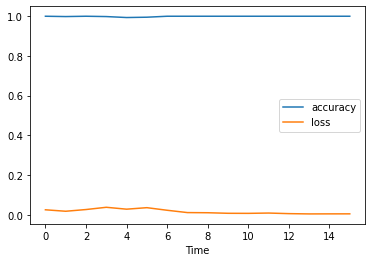

In [8]:
# Plot the training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.xlabel('Time')
plt.legend(['accuracy', 'loss'])
plt.show()

In [9]:
# Function to predict the class of an image
def predict_image(image_path):
    try:
        img = image.load_img(image_path, target_size=(224, 224, 3))
        plt.imshow(img)
        plt.show()
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        images = np.vstack([x])
        pred = model.predict(images, batch_size=32)
        print("Actual: " + (image_path.split("/")[-1]).split("_")[0])
        print("Predicted: " + classes[np.argmax(pred)])
    except FileNotFoundError:
        print("Error: The specified image file was not found.")

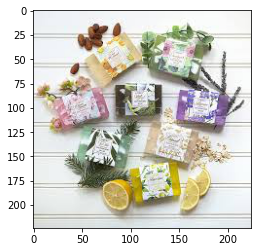

1/1 [==============================] - 0s 130ms/step
Actual: E:\Graduation Project\ML\Categories\soap\soap
Predicted: soap


In [10]:
# Predict the class of an image
predict_image("E:\Graduation Project\ML\Categories\soap\soap_49.jpg")

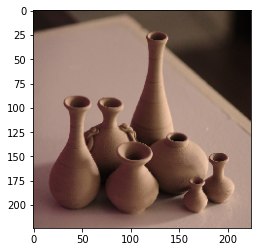

1/1 [==============================] - 0s 19ms/step
Actual: E:\Graduation Project\ML\Categories\pottery\pottery
Predicted: pottery


In [11]:
# Predict the class of an image
predict_image("E:\Graduation Project\ML\Categories\pottery\pottery_8.jpg")

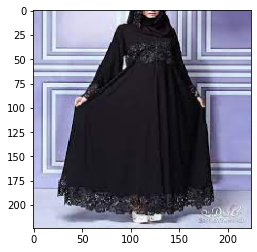

1/1 [==============================] - 0s 21ms/step
Actual: E:\Graduation Project\ML\Categories\sewing\sewing
Predicted: sewing


In [12]:
# Predict the class of an image
predict_image("E:\Graduation Project\ML\Categories\sewing\sewing_43.jpg")

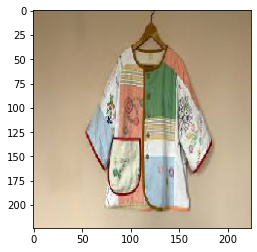

1/1 [==============================] - 0s 21ms/step
Actual: E:\Graduation Project\ML\Categories\sewing\sewing
Predicted: sewing


In [13]:
# Predict the class of an image
predict_image("E:\Graduation Project\ML\Categories\sewing\sewing_1.jpg")

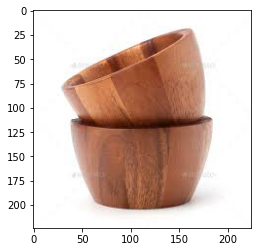

1/1 [==============================] - 0s 21ms/step
Actual: E:\Graduation Project\ML\Categories\wooden\wooden
Predicted: wooden


In [14]:
# Predict the class of an image
predict_image("E:\Graduation Project\ML\Categories\wooden\wooden_13.jpg")

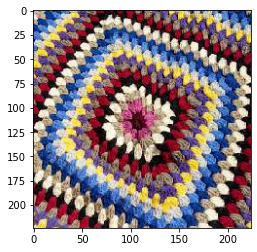

1/1 [==============================] - 0s 20ms/step
Actual: E:\Graduation Project\ML\Categories\crocheting\crocheting
Predicted: crocheting


In [15]:
# Predict the class of an image
predict_image("E:\Graduation Project\ML\Categories\crocheting\crocheting_12.jpg")

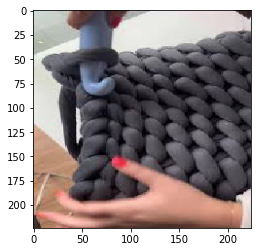

1/1 [==============================] - 0s 22ms/step
Actual: E:\Graduation Project\ML\Categories\crocheting\crocheting
Predicted: crocheting


In [16]:
# Predict the class of an image
predict_image("E:\Graduation Project\ML\Categories\crocheting\crocheting_49.jpg")

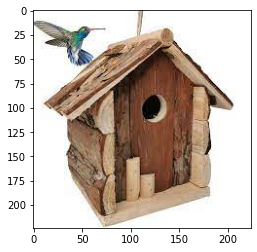

1/1 [==============================] - 0s 20ms/step
Actual: test.jpg
Predicted: wooden


In [17]:
# Predict the class of an image
predict_image("E:/Graduation Project/ML/Categories/wooden/test.jpg")

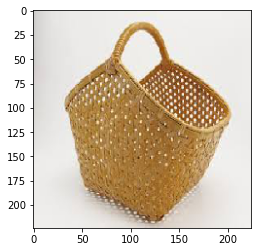

1/1 [==============================] - 0s 21ms/step
Actual: test.jpg
Predicted: bamboo


In [18]:
# Predict the class of an image
predict_image("E:/Graduation Project/ML/Categories/bamboo/test.jpg")

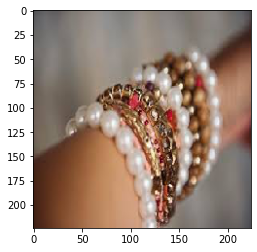

1/1 [==============================] - 0s 21ms/step
Actual: jewelry
Predicted: jewelry


In [22]:
# Predict the class of an image
predict_image("E:/Graduation Project/ML/Categories/jewelry/jewelry_72.jpeg")

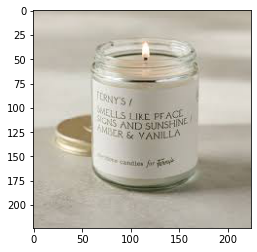

1/1 [==============================] - 0s 20ms/step
Actual: candles
Predicted: candles


In [20]:
# Predict the class of an image
predict_image("E:/Graduation Project/ML/Categories/candles/candles_45.jpg")

In [23]:
# Evaluate model accuracy on a separate test dataset
test_dir = "E:/Graduation Project/ML/Categories"
test_generator = ImageDataGenerator()
test_ds = test_generator.flow_from_directory(test_dir, target_size=(224, 224), batch_size=32)

Found 619 images belonging to 10 classes.


In [24]:
_, accuracy = model.evaluate(test_ds)
print("Test Accuracy:", accuracy)

20/20 [==============================] - 4s 168ms/step - loss: 0.0032 - accuracy: 1.0000
Test Accuracy: 1.0
